In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [18]:
# Load the data

data_path = Path('../data/processed/clean/clean_events.csv')
df = pd.read_csv(data_path)

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns}")
print('--' * 40)

df.head()


Dataset Shape: (270, 13)
Columns: Index(['year', 'event_name', 'stroke', 'gender', 'distance', 'A_cutoff_sec',
       'B_cutoff_sec', 'C_cutoff_sec', 'A_entries', 'B_entries', 'C_entries',
       'finals', 'prelims'],
      dtype='object')
--------------------------------------------------------------------------------


,year,event_name,stroke,gender,distance,A_cutoff_sec,B_cutoff_sec,C_cutoff_sec,A_entries,B_entries,C_entries,finals,prelims
0,2006,100_Backstroke,Backstroke,Men,100,56.30,56.30,56.30,"[{'rank': '8', 'name': 'Waskom, Mike', 'yr': '...","[{'rank': '20', 'name': 'Kelly, Craig', 'yr': ...",[],"[{'rank': '2', 'name': 'Estacio, Rick', 'yr': ...","[{'rank': '8', 'name': 'Waskom, Mike', 'yr': '..."
1,2006,100_Breaststroke,Breaststroke,Men,100,62.66,62.66,62.66,"[{'rank': '2', 'name': 'Prill, Derek', 'yr': '...","[{'rank': '17', 'name': 'Jacob, Carlo', 'yr': ...",[],"[{'rank': '1', 'name': 'Ancona, John', 'yr': '...","[{'rank': '2', 'name': 'Prill, Derek', 'yr': '..."
2,2006,100_Butterfly,Butterfly,Men,100,55.08,55.08,55.08,"[{'rank': '5', 'name': 'Holmes, C.J.', 'yr': '...","[{'rank': '17', 'name': 'Kaplan, Adam', 'yr': ...",[],"[{'rank': '4', 'name': 'Tanz, Josh', 'yr': 'SR...","[{'rank': '5', 'name': 'Holmes, C.J.', 'yr': '..."
3,2006,100_Freestyle,Freestyle,Men,100,48.60,49.20,54.39,"[{'rank': '5', 'name': 'Shields, Andrew', 'yr'...","[{'rank': '17', 'name': 'Stein, Jeff', 'yr': '...","[{'rank': '27', 'name': 'Maslan, Andrew', 'yr'...","[{'rank': '3', 'name': 'Baker, Brett', 'yr': '...","[{'rank': '5', 'name': 'Shields, Andrew', 'yr'..."
4,2006,200_Backstroke,Backstroke,Men,200,121.01,137.16,137.16,"[{'rank': '5', 'name': 'Estacio, Rick', 'yr': ...","[{'rank': '15', 'name': 'Waskom, Mike', 'yr': ...",[],"[{'rank': '1', 'name': 'Godsey, Jonathan', 'yr...","[{'rank': '5', 'name': 'Estacio, Rick', 'yr': ..."


In [19]:
print(f"Unique events: {df['event_name'].value_counts()}")

print('--' * 40)

print(f"Year Range: {df['year'].min()} - {df['year'].max()}")

Unique events: event_name
100_Backstroke      18
100_Breaststroke    18
100_Butterfly       18
100_Freestyle       18
200_Backstroke      18
200_Breaststroke    18
200_Butterfly       18
200_Freestyle       18
200_IM              18
400_IM              18
500_Freestyle       18
50_Backstroke       18
50_Breaststroke     18
50_Butterfly        18
50_Freestyle        18
Name: count, dtype: int64
--------------------------------------------------------------------------------
Year Range: 2006 - 2025


In [20]:
# Datatypes
print("Datatypes:")
print(f"A_cutoff_sec: {df['A_cutoff_sec'].dtype}")
print(f"B_cutoff_sec: {df['B_cutoff_sec'].dtype}")
print(f"C_cutoff_sec: {df['C_cutoff_sec'].dtype}")

# Convert to numeric just in case

for col in ['A_cutoff_sec', 'B_cutoff_sec', 'C_cutoff_sec']:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

print("After Conversion:")
print(f"A_cutoff_sec: {df['A_cutoff_sec'].dtype}")
print(f"B_cutoff_sec: {df['B_cutoff_sec'].dtype}")
print(f"C_cutoff_sec: {df['C_cutoff_sec'].dtype}")

Datatypes:
A_cutoff_sec: float64
B_cutoff_sec: float64
C_cutoff_sec: float64
After Conversion:
A_cutoff_sec: float64
B_cutoff_sec: float64
C_cutoff_sec: float64


In [21]:
# Unique ID

df['event_id'] = df['gender'] + '_' + df['event_name']

print(f"Unique events: {df['event_id'].value_counts()}")




Unique events: event_id
Men_100_Backstroke      18
Men_100_Breaststroke    18
Men_100_Butterfly       18
Men_100_Freestyle       18
Men_200_Backstroke      18
Men_200_Breaststroke    18
Men_200_Butterfly       18
Men_200_Freestyle       18
Men_200_IM              18
Men_400_IM              18
Men_500_Freestyle       18
Men_50_Backstroke       18
Men_50_Breaststroke     18
Men_50_Butterfly        18
Men_50_Freestyle        18
Name: count, dtype: int64


In [ ]:
def plot_event_cutoffs(event_data, event_name, output_dir):
    # sort by year
    event_data = event_data.sort_values('year')

    # compute year bounds
    min_year = int(event_data['year'].min()) - 1
    max_year = int(event_data['year'].max()) + 1

    plt.figure(figsize=(12,8))

    if not event_data['A_cutoff_sec'].isna().all():
        plt.plot(event_data['year'], event_data['A_cutoff_sec'],
                 marker='o', linewidth=2, markersize=6,
                 label='A Final Cutoff', color='red')

    if not event_data['B_cutoff_sec'].isna().all():
        plt.plot(event_data['year'], event_data['B_cutoff_sec'],
                 marker='s', linewidth=2, markersize=6,
                 label='B Final Cutoff', color='blue')

    if not event_data['C_cutoff_sec'].isna().all():
        plt.plot(event_data['year'], event_data['C_cutoff_sec'],
                 marker='^', linewidth=2, markersize=6,
                 label='C Final Cutoff', color='green')

    plt.title(f'{event_name} Final Cutoffs by Year', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.legend(fontsize=10)

    # set continuous x-axis from min_year to max_year
    plt.xlim(min_year, max_year)
    plt.xticks(
        ticks=range(min_year, max_year + 1),
        rotation=45
    )

    # save
    safe_name = event_name.replace(' ', '_').replace('/', '_')
    output_path = Path(output_dir) / f'{safe_name}_cutoffs.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()

    return output_path

In [32]:
output_dir = Path('../output/plots/event_cutoffs')
output_dir.mkdir(parents=True, exist_ok=True)

print(f"Creating plots in: {output_dir.absolute()}")

Creating plots in: /Users/hlecates/Desktop/aqua-analytics/nescac/notebooks/../output/plots/event_cutoffs


Error creating plot for Men_100_Backstroke: name 're' is not defined
Error creating plot for Men_100_Breaststroke: name 're' is not defined
Error creating plot for Men_100_Butterfly: name 're' is not defined
Error creating plot for Men_100_Freestyle: name 're' is not defined
Error creating plot for Men_200_Backstroke: name 're' is not defined
Error creating plot for Men_200_Breaststroke: name 're' is not defined
Error creating plot for Men_200_Butterfly: name 're' is not defined
Error creating plot for Men_200_Freestyle: name 're' is not defined
Error creating plot for Men_200_IM: name 're' is not defined
Error creating plot for Men_400_IM: name 're' is not defined
Error creating plot for Men_500_Freestyle: name 're' is not defined
Error creating plot for Men_50_Backstroke: name 're' is not defined
Error creating plot for Men_50_Breaststroke: name 're' is not defined
Error creating plot for Men_50_Butterfly: name 're' is not defined
Error creating plot for Men_50_Freestyle: name 're' i

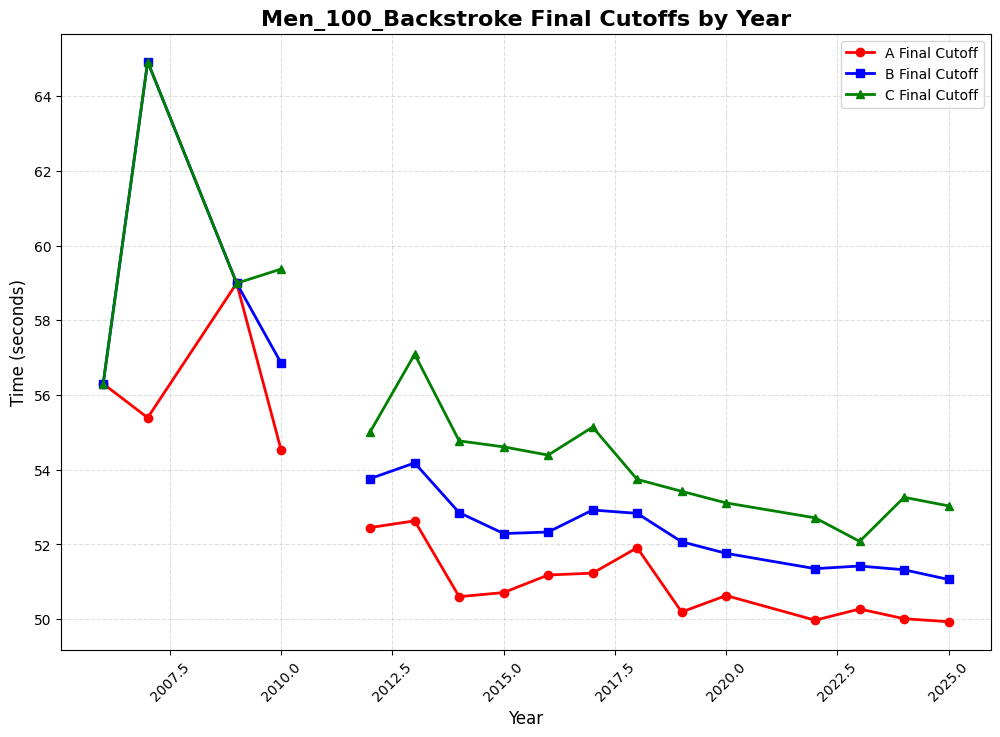

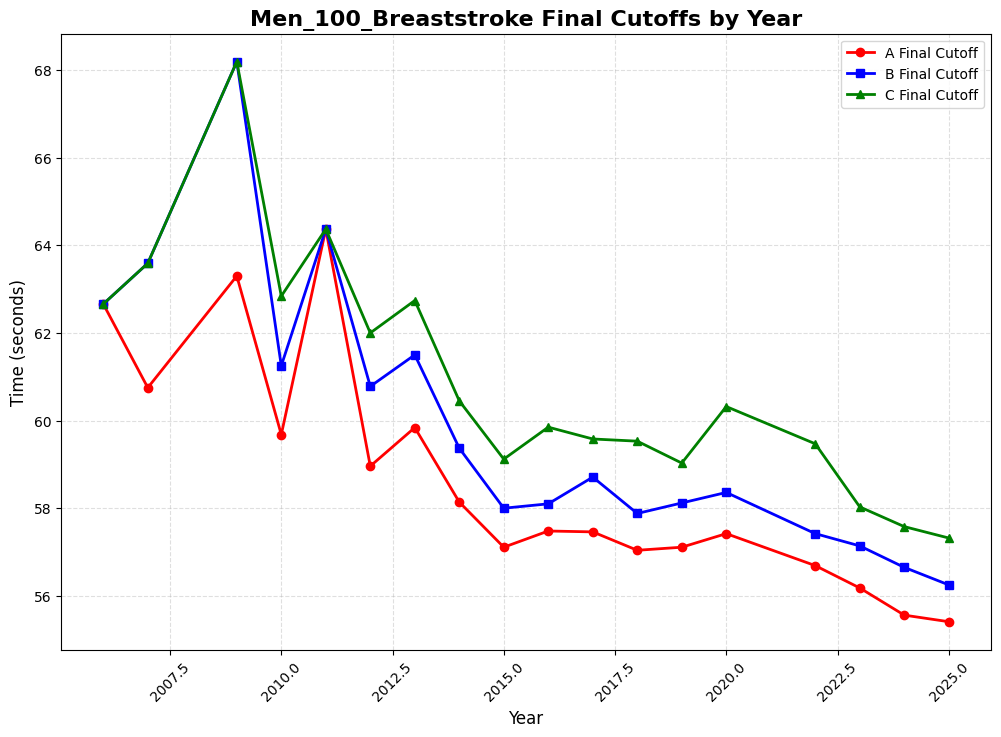

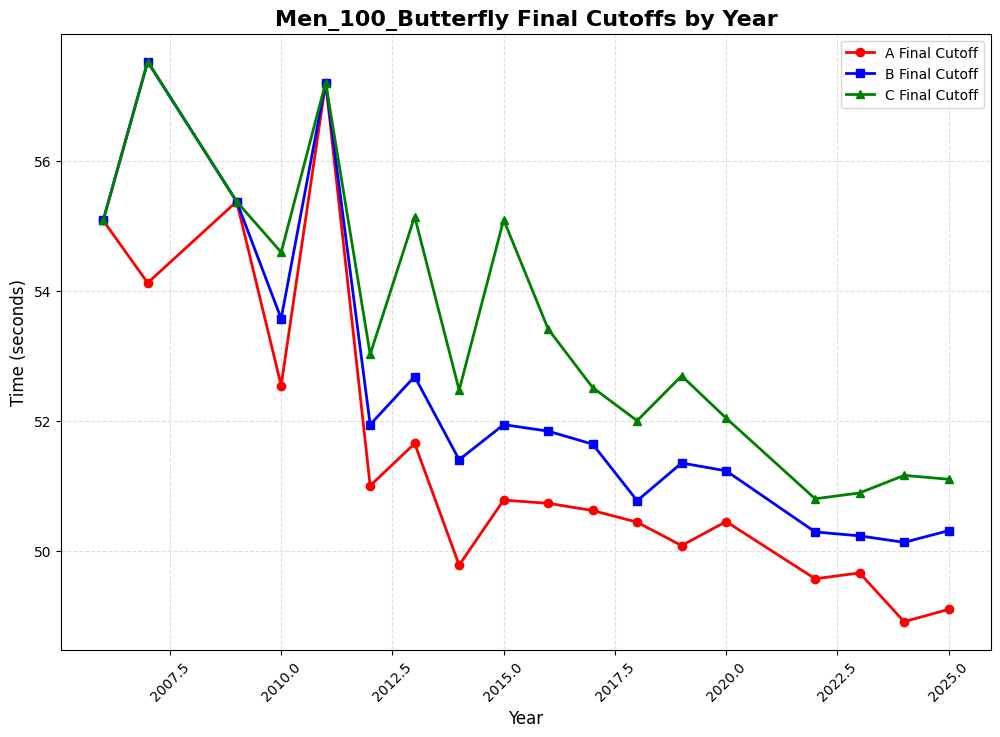

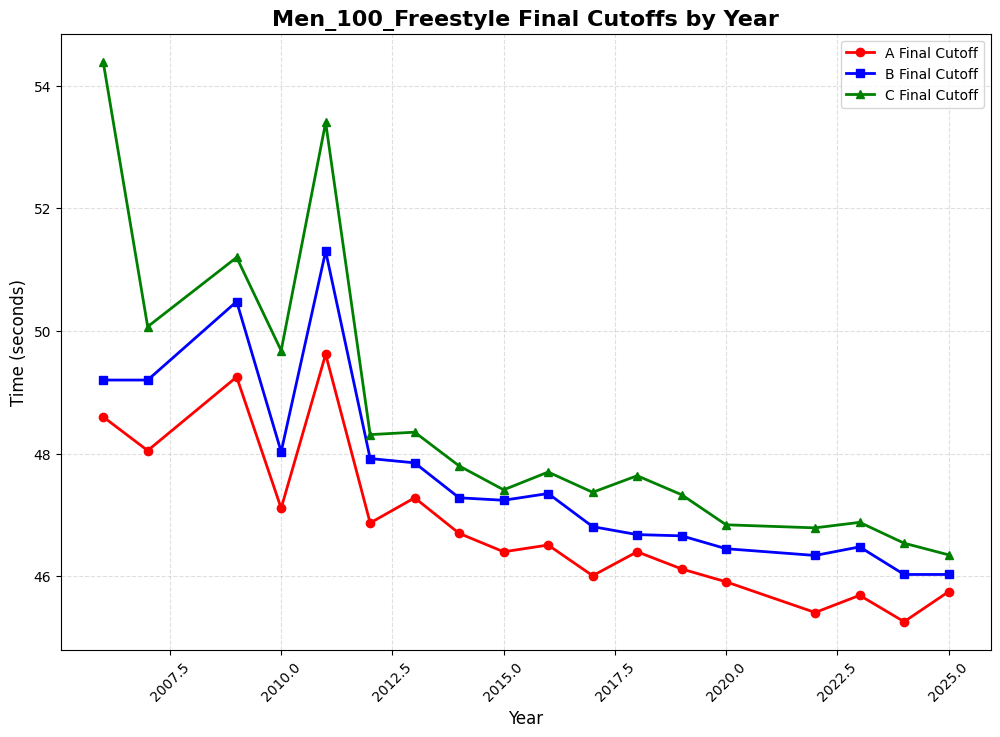

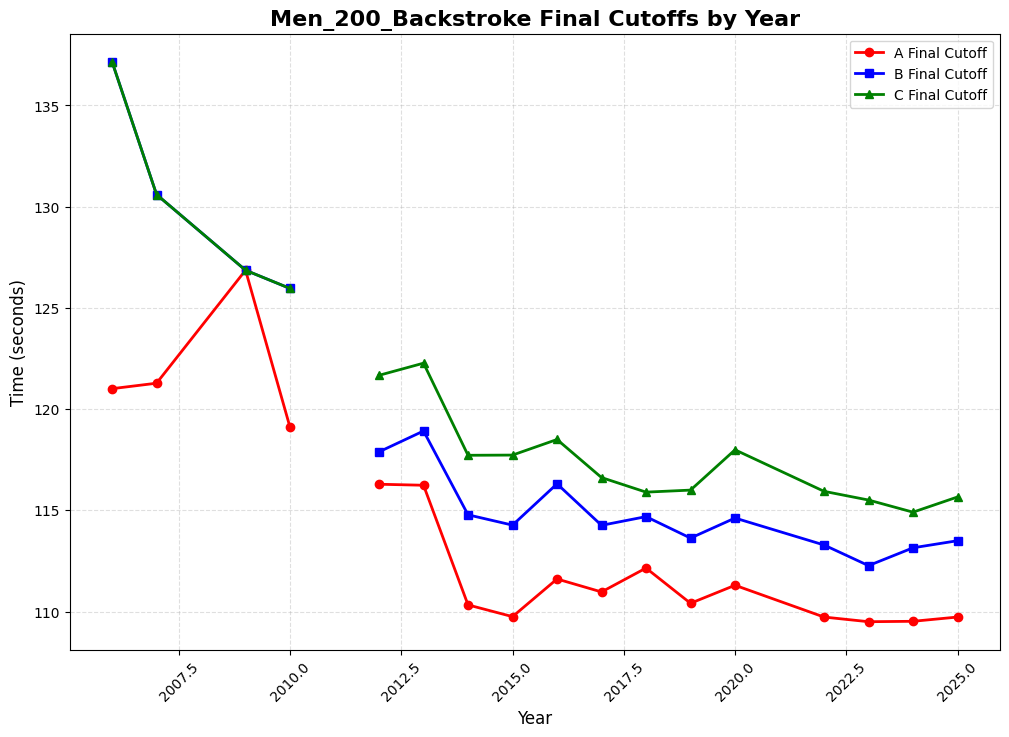

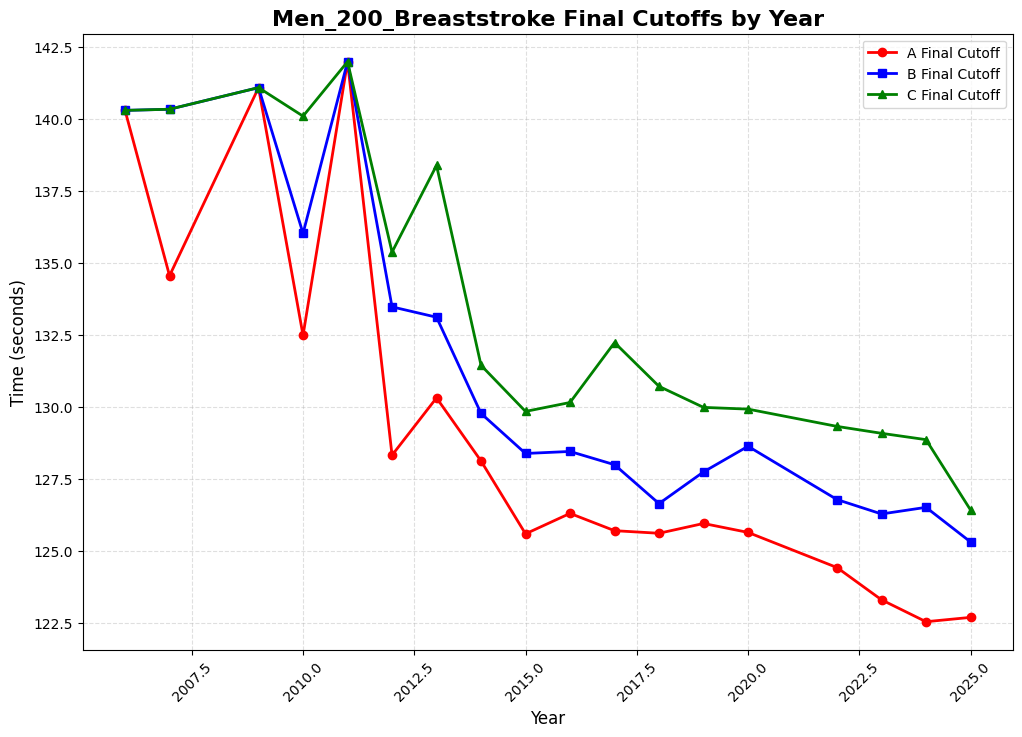

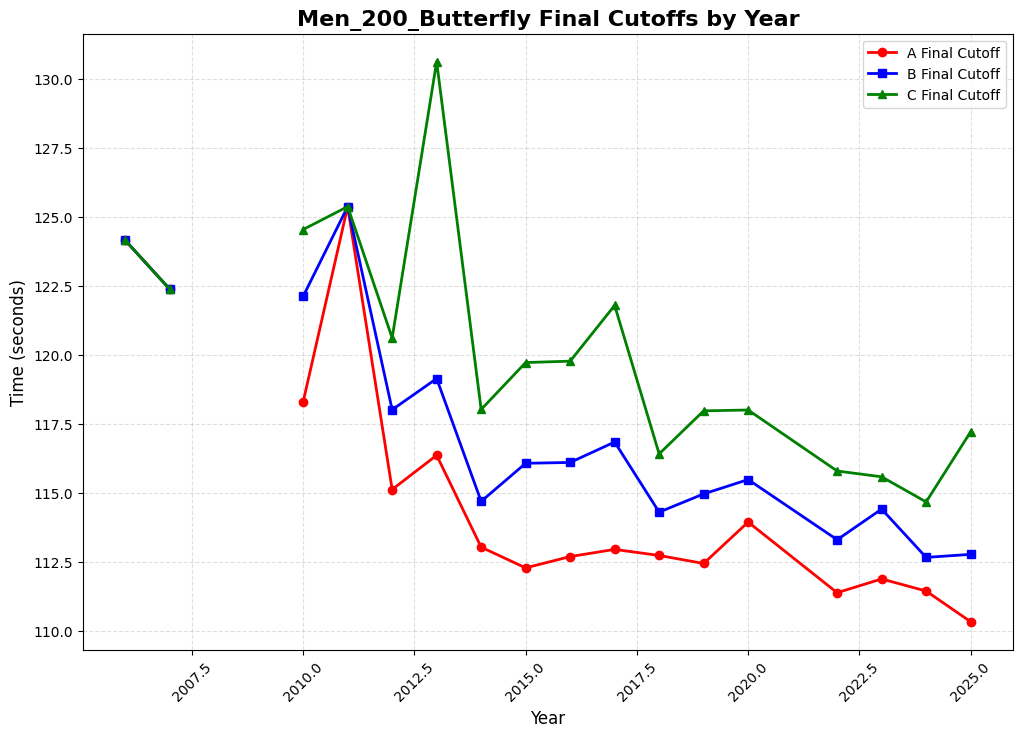

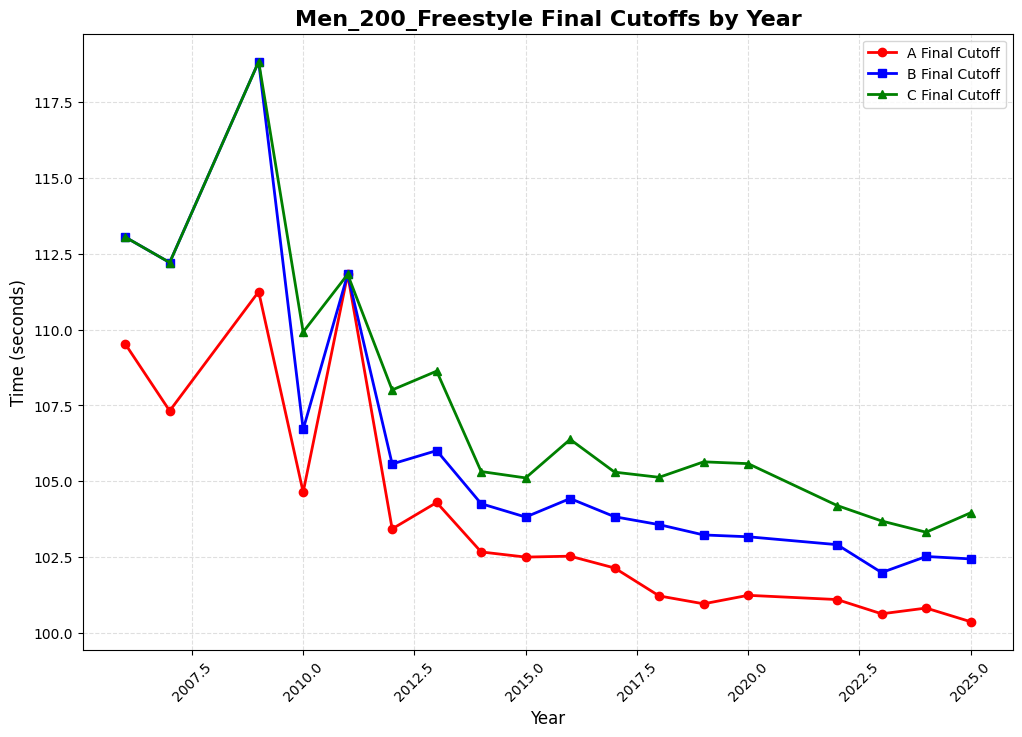

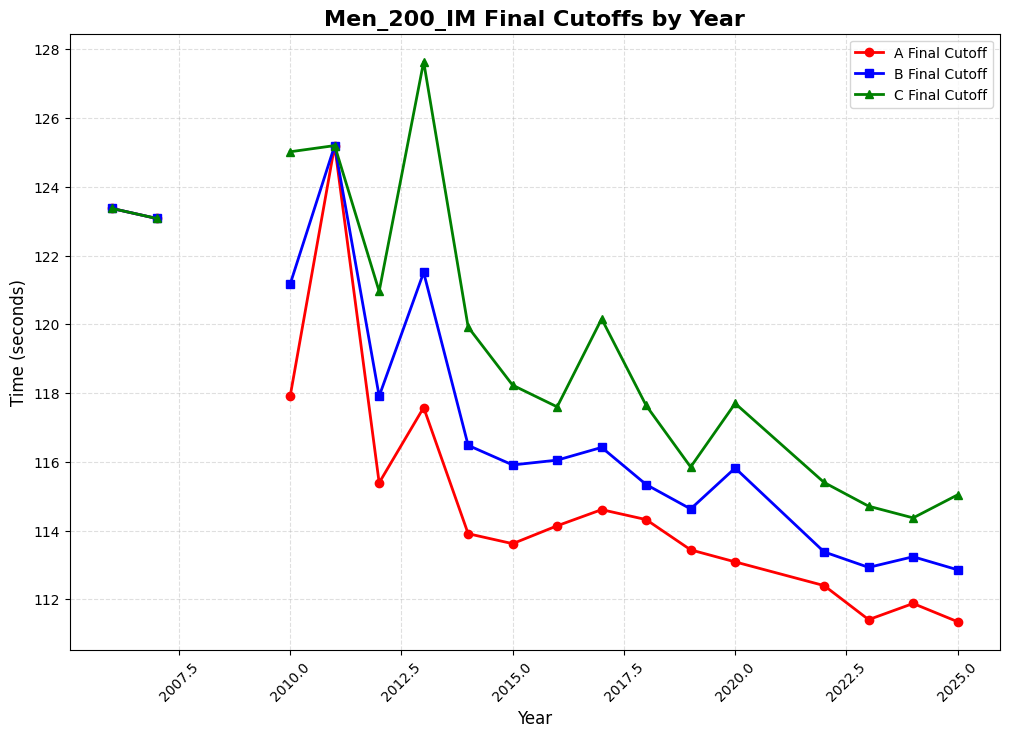

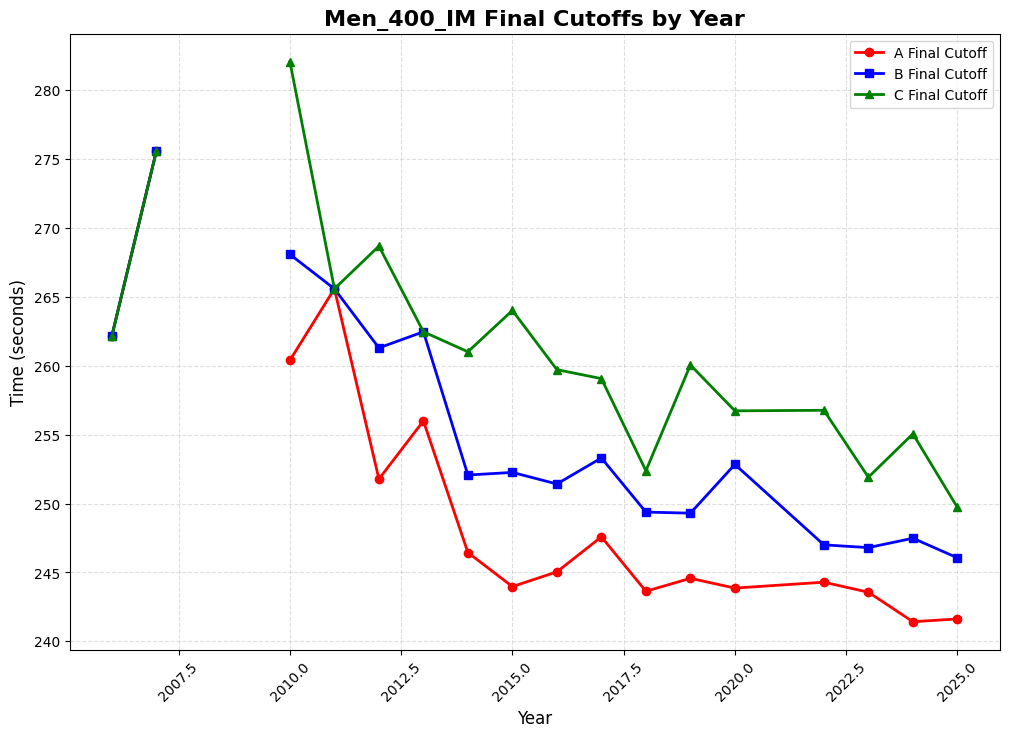

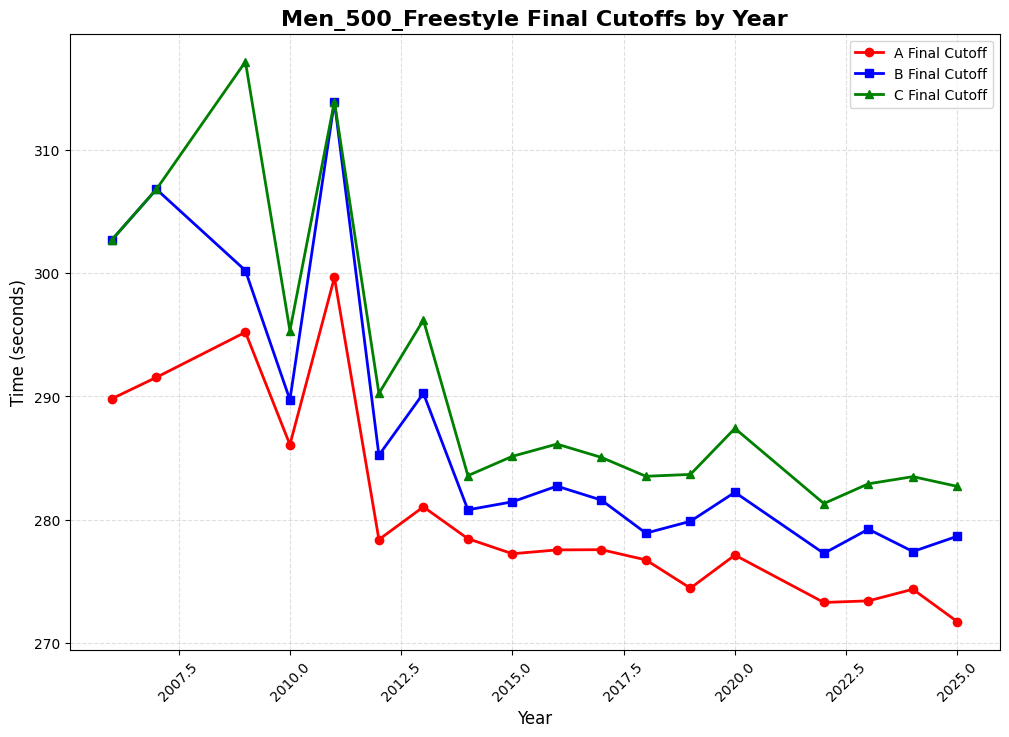

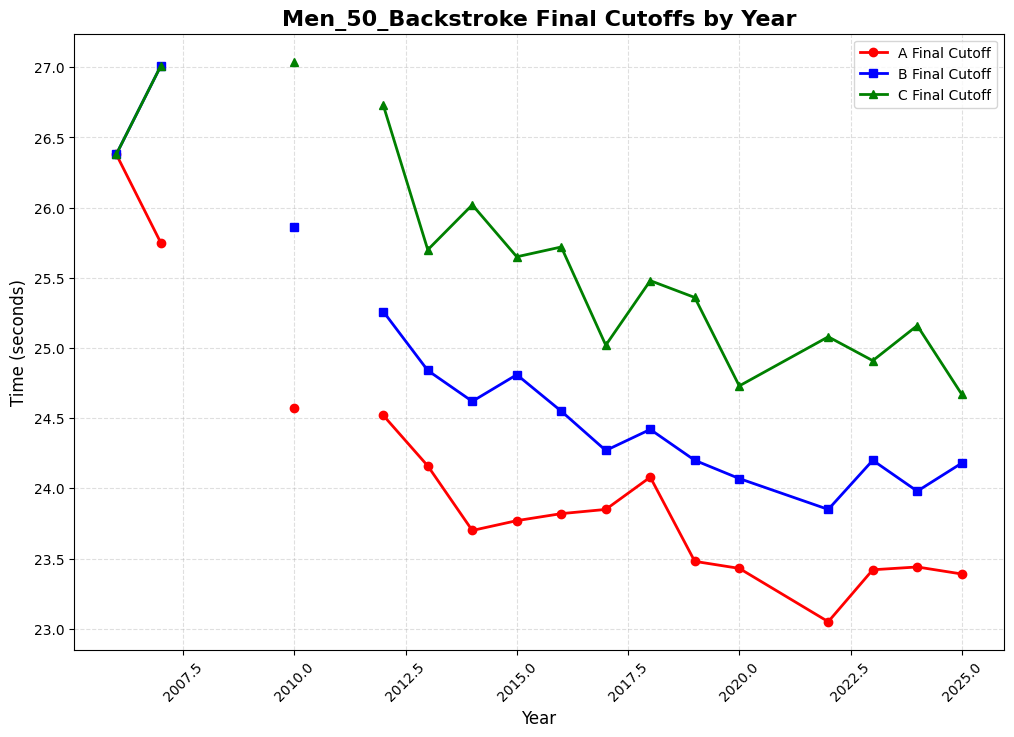

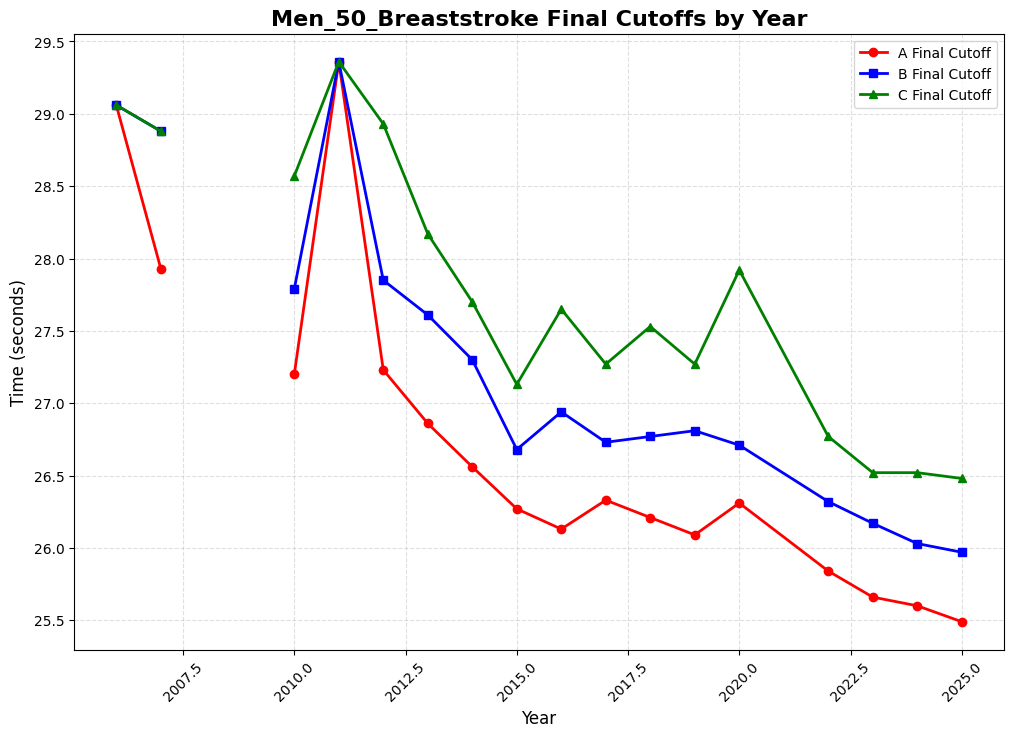

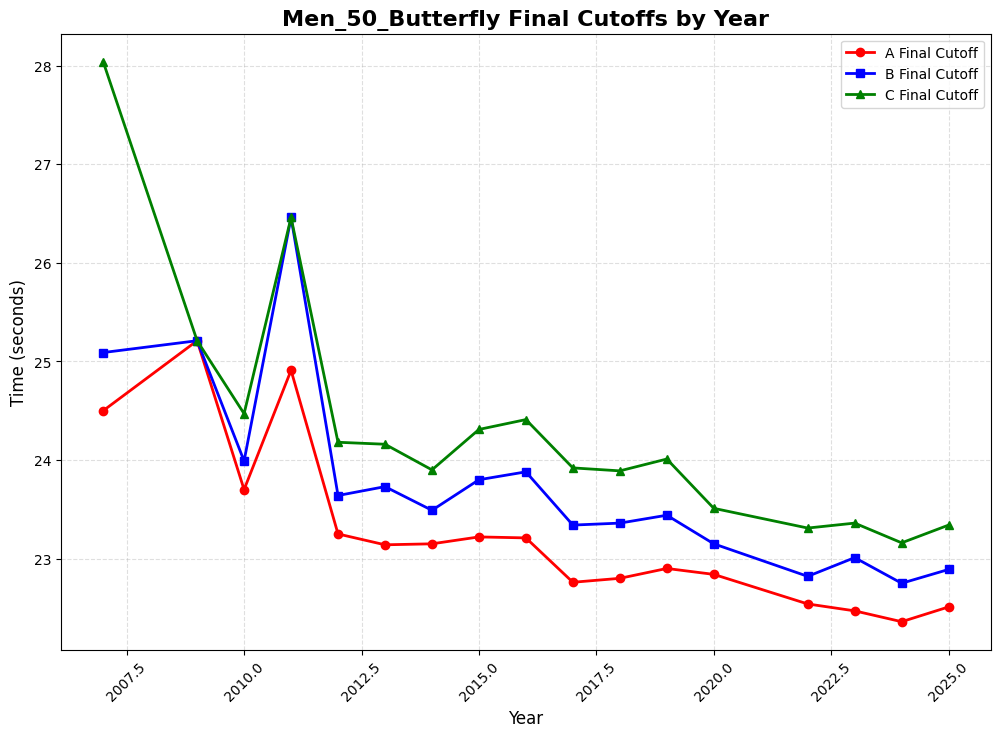

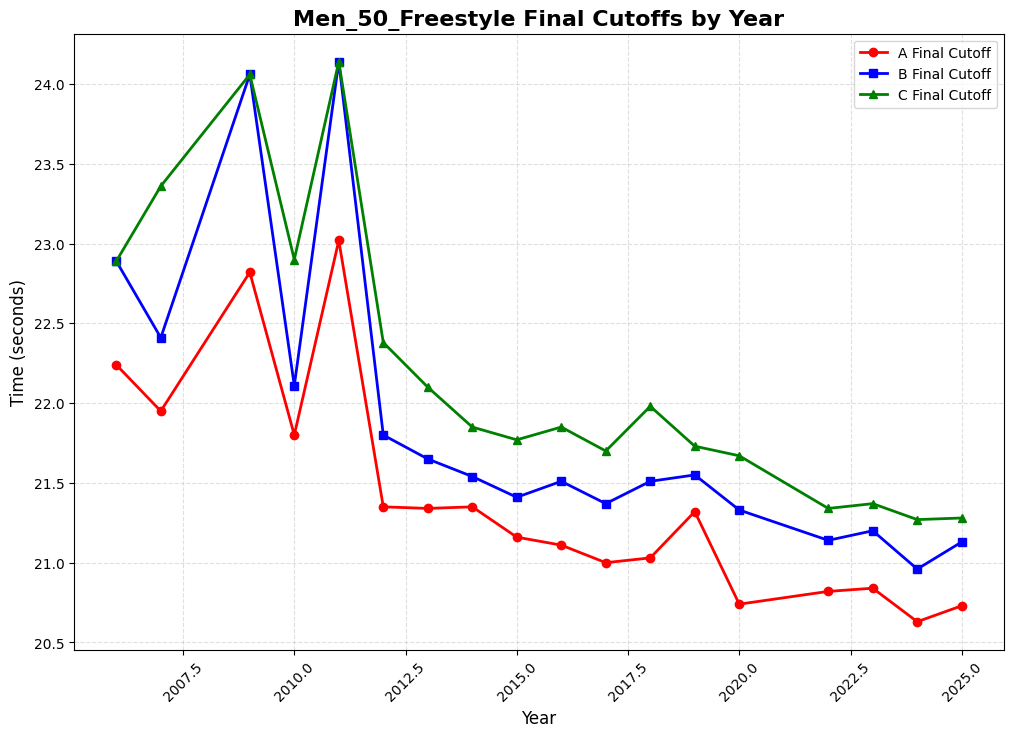

In [33]:
saved_plots = []

for event_id in df['event_id'].unique():
    event_data = df[df['event_id'] == event_id]

    if event_data[['A_cutoff_sec', 'B_cutoff_sec', 'C_cutoff_sec']].isna().all().all():
        continue

    plot_title = f'{event_id}'

    try:
        plot_path = plot_event_cutoffs(event_data, plot_title, output_dir)
        saved_plots.append(plot_path)
        print(f"Created plot: {plot_title}")
    except Exception as e:
        print(f"Error creating plot for {plot_title}: {e}")

print(f"Total plots created: {len(saved_plots)}")